SPODNJA CELICA JE SAMO ZA PRIKAZ NELINEARNE TRIGONOMETRIČNE ENAČBE

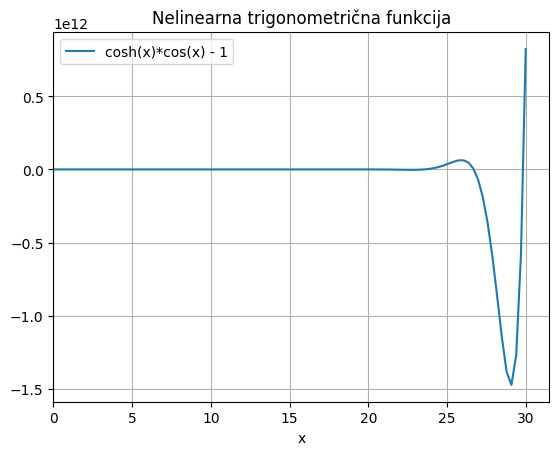

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def det(x):
    return np.cosh(x)*np.cos(x)-1

x = np.linspace(0, 30, 100)
plt.plot(x, det(x), label='cosh(x)*cos(x) - 1')
plt.xlabel('x')
plt.title('Nelinearna trigonometrična funkcija')
plt.legend()
plt.grid(True)
plt.xlim(left=0)

plt.savefig('graf.png', dpi=300)
plt.show()

Podatke sem ocenu preko te spletne strani: https://www.simplify3d.com/resources/materials-guide/properties-table/
SPODNJA CELICA JE ZA ISKANJE REŠITEV PA PRIKAZ NA ENEM PRIMERU

Prosto vpet nosilec

In [2]:
# Uvozimo vse potrebne pakete in funkcije
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from ipywidgets import interact, IntSlider, FloatSlider
from matplotlib.animation import FuncAnimation

# Valovno število k_n pomnoženo z dolžino
def det(x):
    return np.cosh(x)*np.cos(x)-1

# Definiramo območje, v katerem iščemo rešitve
x0 = np.linspace(5, 150, 100)

# seznam rešitev
r = []

# for zanka za iskanje rešitve
for i in x0:
    res = root(det, i)
    if res.success:
        root_res = res.x[0]
        # Definiramo unikatne rešitve, kjer mora biti razlika med rešitvami > 1
        if not any(np.isclose(root_res, j, atol = 1) for j in r):
            r.append(root_res)
            # Ko imamo 5 rešitev, prekinemo zanko
            if len(r) >=5:
                break

print(f'Prvih 5 k_n*L je:')
for k_nL in r:
    print(f'{k_nL:0.5f} [1/m * m]')

# Lastne frekvence ω_n -> mora biti v osnovnih enotah, če ne pride do stack overflowa
togost = 53*10**6 # Youngov modul [Pa]
a = 5/1000 # stranica kvadrata prečnega prereza [m]
I = (a**4)*0.5 /12 # vztrajnostni moment prečnega prereza nosilca [m^4]
μ = (1.24*1000)*a**2 # masna porazdelitev na enoto dolžine [kg/m]
L = 300/1000 # dolžina nosilca [m]

frekvence = []

for i in r:
    f = np.sqrt(((i / L)**4)*togost*I / μ)
    frekvence.append(f)

print(f'Prvih 5 lastnih frekvenc je:')
for ω_n in frekvence:
    print(f'{ω_n:0.5f} [Hz]')

# Neznani koeficienti A_i
A = []

for k_nL in r:
    A_i = 1*(-np.sinh(k_nL) + np.sin(k_nL))/(np.cosh(k_nL) - np.cos(k_nL))
    A.append(A_i)

print(f'Koeficienti A_i so:')
for i in A:
    print(f'{i:0.5f}')

# Upogib nosilca
def upogib(x, t, k_nL, omega_n, μ=μ, I=I, togost=togost):
    enačbe = 0
    B = 1.0
    for k, omega in zip(k_nL, omega_n):
        k_value = np.sqrt(np.sqrt(((μ*omega**2)/togost*I)))
        A = B*(-np.sinh(k) + np.sin(k))/(np.cosh(k) - np.cos(k))
        en = (A*np.cosh(k_value*x) + B*np.sinh(k_value*x) + A*np.cos(k_value*x) + B*np.sin(k_value*x))*(np.cos(omega*t) + np.sin(omega*t))
        enačbe += en
    return enačbe*1000

# Prikaz
x = np.linspace(0, L, 100)
y_min = -5
y_max = 5

# Definiranje grafa, ki se spreminja po času
def graf(t):
    y = upogib(x, t, r, frekvence)
    rez1 = y / max(abs(y))
    
    plt.figure(figsize=(10, 6))
    plt.plot(x*1000, rez1, label=f't = {t} s')
    plt.xlabel('x [mm]')
    plt.ylabel('w / max(w) [/]')
    plt.title('Upogib glede na čas')
    plt.xlim(0, (L*1000))
    plt.xticks(np.arange(0, L*1000+10, 20)) 
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'{rez1[0], rez1[25], rez1[50], rez1[75], rez1[-1]}')

# Slider s korakom 0.01
interact(graf, t=FloatSlider(min=0, max=20, step=0.01, value=0))


Prvih 5 k_n*L je:
4.73004 [1/m * m]
7.85320 [1/m * m]
10.99561 [1/m * m]
14.13717 [1/m * m]
17.27876 [1/m * m]
Prvih 5 lastnih frekvenc je:
52.45401 [Hz]
144.59151 [Hz]
283.45717 [Hz]
468.56911 [Hz]
699.96140 [Hz]
Koeficienti A_i so:
-1.01781
-0.99922
-1.00003
-1.00000
-1.00000


interactive(children=(FloatSlider(value=0.0, description='t', max=20.0, step=0.01), Output()), _dom_classes=('…

<function __main__.graf(t)>

FIKSNO VPET NOSILEC

Prvih 5 k_n*L je:
1.87510 [1/m * m]
4.69409 [1/m * m]
7.85476 [1/m * m]
10.99554 [1/m * m]
14.13717 [1/m * m]
Prvih 5 lastnih frekvenc je:
2.53190 [Hz]
15.86716 [Hz]
44.42849 [Hz]
87.06212 [Hz]
143.91992 [Hz]


interactive(children=(FloatSlider(value=0.0, description='t', max=20.0, step=0.01), Output()), _dom_classes=('…

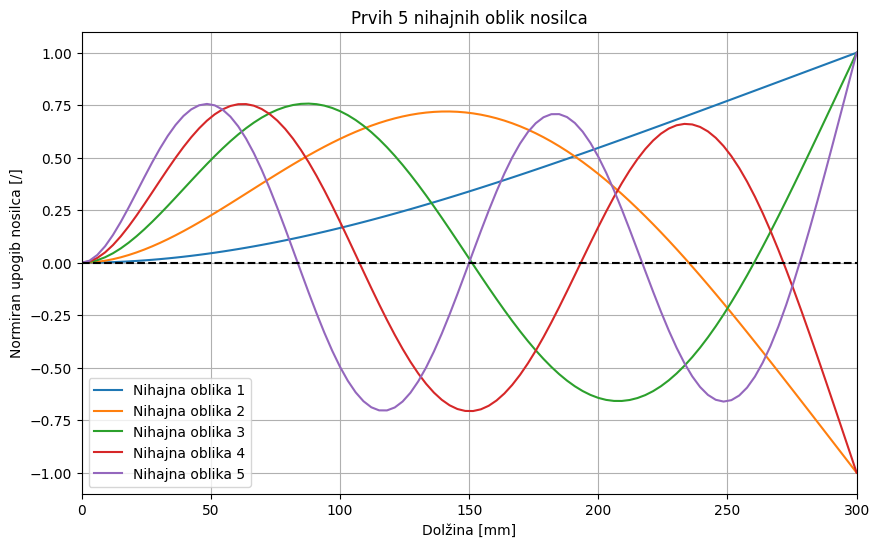

In [3]:
# Uvozimo vse potrebne pakete in funkcije
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from ipywidgets import interact, IntSlider, FloatSlider
from matplotlib.animation import FuncAnimation


# Valovno število k_n pomnoženo z dolžino
def wave_num(x):
    return np.cosh(x)*np.cos(x)+1

# Definiramo območje, v katerem iščemo rešitve
x0 = np.linspace(1, 100, 100)

# seznam rešitev
r = []

# for zanka za iskanje rešitve
for i in x0:
    res = root(wave_num, i)
    if res.success:
        root_res = res.x[0]
        # Definiramo unikatne rešitve, kjer mora biti razlika med rešitvami > 1
        if not any(np.isclose(root_res, j, atol = 1) for j in r):
            r.append(root_res)
            # Ko imamo 5 rešitev, prekinemo zanko
            if len(r) >=5:
                break

print(f'Prvih 5 k_n*L je:')
for k_nL in r:
    print(f'{k_nL:0.5f} [1/m * m]')


# Lastne frekvence ω_n -> mora biti v osnovnih enotah, če ne pride do stack overflowa
togost = 5*10**6 # Youngov modul [Pa]
a = 5/1000 # stranica kvadrata prečnega prereza [m]
I = (a**4)*0.5 /12 # vztrajnostni moment prečnega prereza nosilca [m^4]
μ = (1.24*1000)*a**2 # masna porazdelitev na enoto dolžine [kg/m]
L = 300/1000 # dolžina nosilca [m]

frekvence = []

for i in r:
    f = np.sqrt(((i / L)**4)*togost*I / μ)
    frekvence.append(f)

print(f'Prvih 5 lastnih frekvenc je:')
for ω_n in frekvence:
    print(f'{ω_n:0.5f} [Hz]')


# Neznani koeficienti A_i

A = []

def coeff(x):
    return -1*(np.sinh(x) + np.sin(x))/(np.cosh(x) + np.cos(x))

for k_nL in r:
    A_i = -1*(np.sinh(k_nL) + np.sin(k_nL))/(np.cosh(k_nL) + np.cos(k_nL))
    A.append(A_i)

#print(f'Koeficienti A_i so:')
#for i in A:
    #print(f'{i:0.5f}')

matrika = np.column_stack((A, frekvence))


# Upogib nosilca
def upogib_vpet(x, t, A_n, omega_n, μ=μ, I=I, togost=togost):
    enačbe = 0
    B = 1
    for omega, A in zip(omega_n, A_n):
        k = np.sqrt(np.sqrt(((μ*omega**2)/togost*I)))
        en = (A*np.cosh(k*x) + B*np.sinh(k*x) - A*np.cos(k*x) - B*np.sin(k*x))*(np.cos(omega*t) + np.sin(omega*t))
        enačbe += en
    return enačbe*1000
# Prikaz
x = np.linspace(0, L, 100)
y_min = -10
y_max = 10

# Definiranje grafa, ki se spreminja po času
def graf(t):
    y = upogib_vpet(x, t, coeff(r), frekvence)
    rez = y / max(abs(y))
    
    plt.figure(figsize=(10, 6))
    plt.plot(x*1000, rez, label=f't = {t} s', linewidth=1.5)
    plt.xlabel('x [mm]')
    plt.ylabel('w / max(w) [/]')
    plt.title('Upogib glede na čas')
    plt.xlim(0, (L*1000))
    plt.xticks(np.arange(0, L*1000+10, 20)) 
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'{rez[0], rez[25], rez[50], rez[75], rez[-1]}')

# Slider s korakom 0.01
interact(graf, t=FloatSlider(min=0, max=20, step=0.01, value=0))

def mode_shapes(x, beta_L, L):
    B = (np.cos(beta_L) + np.cosh(beta_L)) / (np.sin(beta_L) + np.sinh(beta_L))
    k = beta_L / L
    eq = (np.cosh(k*x) - np.cos(k*x)) + B*(np.sin(k*x) - np.sinh(k*x))
    eq1 = eq / max(abs(eq))
    return eq1

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 300, 100), mode_shapes(np.linspace(0, 300, 100), r[0], 300), label='Nihajna oblika 1')
plt.plot(np.linspace(0, 300, 100), mode_shapes(np.linspace(0, 300, 100), r[1], 300), label='Nihajna oblika 2')
plt.plot(np.linspace(0, 300, 100), mode_shapes(np.linspace(0, 300, 100), r[2], 300), label='Nihajna oblika 3')
plt.plot(np.linspace(0, 300, 100), mode_shapes(np.linspace(0, 300, 100), r[3], 300), label='Nihajna oblika 4')
plt.plot(np.linspace(0, 300, 100), mode_shapes(np.linspace(0, 300, 100), r[4], 300), label='Nihajna oblika 5')
plt.xlabel('Dolžina [mm]')
plt.ylabel('Normiran upogib nosilca [/]')
plt.legend()
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Prvih 5 nihajnih oblik nosilca')
plt.xlim([0, 300])
plt.grid(True)
plt.show()


SPODNJA CELICA JE ZA GENERIRANJE PODATKOV ZA FIKSNO VPET NOSILEC

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from ipywidgets import interact, IntSlider, FloatSlider
from matplotlib.animation import FuncAnimation

# Enačba za iskanje rešitev determinante
def val_št(x):
    """
    Funkcija, ki išče rešitev determinante matrične enačbe.

    Param::
    x: Območje iskanja
    """
    return np.cosh(x)*np.cos(x)+1

x0 = np.linspace(5, 150, 100)

val_št_sez = []

# For zanka za iskanje rešitev
for i in x0:
    res = root(val_št, i)
    if res.success:
        root_rešitev = res.x[0]
        # Definiramo pogoj za unikatne rešitve
        if not any(np.isclose(root_rešitev, j, atol = 1) for j in val_št_sez):
            val_št_sez.append(root_rešitev)
            if len(val_št_sez) >= 5:
                break

# Generiranje podatkov
velikost = 1000
rng = np.random.default_rng()
L = rng.uniform(low=100, high=400., size=velikost) / 1000 # [m]
E = rng.uniform(low=5., high=70., size=velikost) # [Pa]
a = 5 / 10**3 # [m] -> stranice so konstantne
I = a**4 / 12 # [m^4] -> vztrajnostni moment je konstanten
mu = rng.uniform(low=0.4, high=1.1, size=velikost)* a**2 *10**3 # [kg / m]
matrika_frekvenc = np.zeros((velikost, 5)) # Za vsak generiran nosilec prvih 5 frekvenc


# Definiranje funkcije za iskanje lastnih frekvenc nosilcev
def frekvence(L, E, mu, I):
    """
    Funkcija, ki izračuna naravne frekvence za vsak nosilec posebej
    
    Param::
    L: dolžina [m]
    E: togost [Pa]
    mu: masna porazdelitev [kg / m^3]
    I: vztrajnostni moment prereza [m^4]
    """
    sez = []

    # Iz valovnih števil izračuna lastne frekvence
    for i in val_št_sez:
        f = np.sqrt(((i / L)**4 * E * I) / mu)
        sez.append(f)
    return sez

# Izračun frekvenc za vsak generiran nosilec
for i in range(velikost):
    L_i = L[i]
    E_i = E[i]
    mu_i = mu[i]
    matrika_frekvenc[i, :] = frekvence(L_i, E_i, mu_i, I)

# Funkcija za izračun nihajnih oblik
def mode_shapes(x, beta_L, L):
    """
    Funkcija za določitev nihajnih oblik

    Param::
    x: točke za določit vrednost pri nihajni obliki
    beta_L: Valovno število pomnoženo z dolžino nosilca
    L: dolžina nosilca
    """
    B = (np.cos(beta_L) + np.cosh(beta_L)) / (np.sin(beta_L) + np.sinh(beta_L))
    k = beta_L / L
    eq = (np.cosh(k*x) - np.cos(k*x)) + B*(np.sin(k*x) - np.sinh(k*x))
    eq1 = eq / max(abs(eq))
    return eq1

# Ustvarjanje 3D matrike pomikov
št_pomikov = 10
matrika_pomikov_3D = np.zeros((velikost, len(val_št_sez), št_pomikov))


for i in range(velikost):
    L_i = L[i]
    for j, beta_L in enumerate(val_št_sez):
        matrika_pomikov_3D[i, j, :] = mode_shapes(np.linspace(0, L_i, št_pomikov), beta_L, L_i)

E = E.reshape((velikost,1))
L = L.reshape((velikost,1))
mu = mu.reshape((velikost,1))


SPODNJA CELICA JE ZA TRENIRANJE MODELA IN NAPOVEDOVANJE

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Definiranje modela
def CNN_model():
    # Definiranje oblike vhodnih parametrov
    pomiki_oblika = (5, 10)
    prvih_5_lastnih_frekvenc_oblika = (5,)
    mu_oblika = (1,)

    # Ustvarjanje vhodnih slojev
    input_pomiki = tf.keras.Input(shape=pomiki_oblika)
    x = layers.Conv1D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(input_pomiki)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Conv1D(64, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.GlobalMaxPooling1D()(x)
    cnn_output_pomiki = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

    input_prvih_5_lastnih_frekvenc = tf.keras.Input(shape=prvih_5_lastnih_frekvenc_oblika)
    y = layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(input_prvih_5_lastnih_frekvenc)
    cnn_output_frekvenc = layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(y)

    input_mu = tf.keras.Input(shape=mu_oblika)
    dense_mu = layers.Dense(32, activation='tanh')(input_mu)

    # Združevanje izhodnih slojev prejšnjih slojev v eno samo plast za nadaljnjo obdelavo
    povezave = layers.Concatenate()([cnn_output_pomiki, cnn_output_frekvenc, dense_mu])
    output_dolzina = layers.Dense(1, activation='tanh', name="dolzina")(povezave)
    output_dolzina_abs = layers.Lambda(lambda x: tf.math.abs(x), name="dolzina_abs")(output_dolzina) # Vedno dobimo pozitivno dolžino
    output_togost = layers.Dense(1, activation='tanh', name="togost")(povezave)
    output_togost_abs = layers.Lambda(lambda x: tf.math.abs(x), name="togost_abs")(output_togost) # Vedno dobimo pozitivno togost

    # Definiranje vhodov in izhodov
    model = models.Model(inputs=[input_pomiki, input_prvih_5_lastnih_frekvenc, input_mu], outputs=[output_dolzina_abs - 2/10000, output_togost_abs*40 + 10])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error') # 
    return model

# Ustvarjanje modela
model = CNN_model()
model.summary()

# Pričakovani izhodi
Y_dolzina = L
Y_togost = E

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treniranje modela glede na vhode in pričakovane izhode
model.fit([matrika_pomikov_3D, matrika_frekvenc, mu], [Y_dolzina, Y_togost], epochs=100, validation_split=0.3, callbacks=[early_stopping])

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_81      │ (None, 5, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_54 (Conv1D)  │ (None, 5, 32)     │        992 │ input_layer_81[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_27    │ (None, 2, 32)     │          0 │ conv1d_54[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_55 (Conv1D)  │ (None, 2, 64)     │      4,160 │ max_pooling1d_27… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_82      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_55[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_109 (Dense)   │ (None, 64)        │        384 │ input_layer_82[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_83      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_108 (Dense)   │ (None, 64)        │      4,160 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_110 (Dense)   │ (None, 64)        │      4,160 │ dense_109[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_111 (Dense)   │ (None, 32)        │         64 │ input_layer_83[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_27      │ (None, 160)       │          0 │ dense_108[0][0],  │
│ (Concatenate)       │                   │            │ dense_110[0][0],  │
│                     │                   │            │ dense_111[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ togost (Dense)      │ (None, 1)         │        161 │ concatenate_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dolzina (Dense)     │ (None, 1)         │        161 │ concatenate_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ togost_abs (Lambda) │ (None, 1)         │          0 │ togost[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dolzina_abs         │ (None, 1)         │          0 │ dolzina[0][0]     │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_27         │ (None, 1)         │          0 │ togost_abs[0][0]  │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_11         │ (None, 1)         │          0 │ dolzina_abs[0][0] │
│ (Subtract)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_35 (Add)        │ (None, 1)         │          0 │ multiply_27[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,242 (55.63 KB)

 Trainable params: 14,242 (55.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 353.0929 - val_loss: 299.9790
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319.5616 - val_loss: 297.7316
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 298.0363 - val_loss: 297.1646
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 318.2124 - val_loss: 295.7716
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304.6277 - val_loss: 291.0596
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 305.3495 - val_loss: 300.1013
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 300.6228 - val_loss: 300.8960
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 291.2028 - val_loss: 327.0609
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 289.0321 - val_loss: 300.1884
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 300.7607 - val_loss: 293.5461
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 278.4192 - val_loss: 285.8250
Epoch 12/100
22/22

In [34]:
# Primer kako dobiti napoved

model = CNN_model()

# Preoblikovanje mu za CNN
mu_L = np.array(mu_L).reshape(1, 1)

# Ustvarjanje napovedi
napovedana_dolžina, napovedana_togost = model.predict([pomiki[np.newaxis, :], frekvence[np.newaxis, :], mu])

napovedana_dolžina = napovedana_dolžina_L[0,0]
napovedana_togost = napovedana_togost_L[0,0]

print(f"Pričakovana dolžina: {napovedana_dolžina * 1000} [mm]")
print(f"Pričakovana togost: {napovedana_togost} [MPa]")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Pričakovana dolžina: 310.5769753456116 [mm]
Pričakovana togost: 10.833009719848633 [MPa]
